# Estadísticos
En el curso de estadística descriptiva ya las describimos, pero vamos a dar un repaso.
- Media: Suma de todas las variables dividido entre el número de variables.
- Moda: El dato que más se repite
- Mediana:  El dato que se encuentra en el centro de todos

### Media muestral
Como su nombre lo indica, es la media de una muestra y se representa con $\bar{X}$, a diferencia de la media poblacional que se representa con $\mu$. Ambas se calculan de la misma forma

### Desv. estandar muestral
Es la desviación estandar de una muestra y se define como:
$$ s = \dfrac{\sum_{i=1}^{N} (x_i - \bar{x})}{N-1}$$
Mientras que la desv estandar poblacional se define como:
$$ \sigma = \dfrac{\sum_{i=1}^{N} (x_i - \bar{x})}{N}$$

Ambas cantidades nos indican que tan dispersos están nuestros datos con respecto a la media, ya sea paera la muestra o la población.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#leemos una base de datos desde una URL sobre longitudes de sepalos y petalos de plantas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/tmp/ipykernel_295/560849702.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal-length'], hist = True, kde=True, bins = int(180/5), color = 'orange')


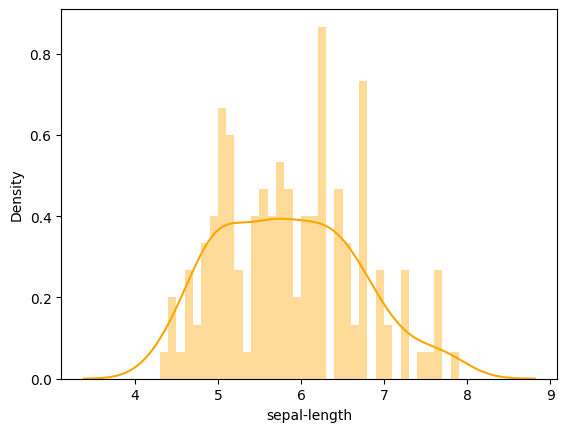

In [3]:
# distribucion de la variable sepal-lenght
sns.distplot(iris['sepal-length'], hist = True, kde=True, bins = int(180/5), color = 'orange')
plt.show()

In [4]:
#varianza poblacional
iris["sepal-length"].var()

0.6856935123042507

In [5]:
#desv estandar poblacional
iris["sepal-length"].std()

0.828066127977863

In [6]:
#con el promedio podemos darnos una idea si la dispersion de los datos es mucho o no
iris["sepal-length"].mean()

5.843333333333334

Al tener una varianza de casi una unidad (0.8280) y el promedio es de alrededor de 6 unidades, podemos decir que si hay una gran dispersión.

Vamos a crear una muestra y calcular sus estadisticos muestrales y compararlos con los poblacionales

In [7]:
muestra = iris.sample(frac = 0.5)
muestra

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
114,5.8,2.8,5.1,2.4,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica


In [8]:
#varianza muestral
muestra["sepal-length"].var()

0.6546846846846844

In [9]:
#desv estandar muestral
muestra["sepal-length"].std()

0.8091258769095724

In [10]:
#media muestral
muestra["sepal-length"].mean()

5.8066666666666675

Obtenemos valores muy parecidos a los poblacionales, la desv estandar sigue estando cerca de la unidad por lo que sigue reflejando que los datos tienen una gran dispersión.

# Intervalos de confianza

Es un par de números entre los cuales se estima que estará cierto valor de un estadístico poblacional. Este se calcula a partir de una muestra y se presenta con un determinado **nivel de confianza o de significación** . Este último es un nivel límite que permite juzgar si un resultado es o no estadísticamente significativo, se representa con un $\alpha$ y es un valor que se encuentra entre el 0 y 1. Cuando el valor es menor al nivel de confianza, el resultado es estadísticamente significativo y no se rechazará la hipótesis nula

### Interpretación de un resultado
Supongamos que deseamos conocer el promedio de edades de una población. Tras diversos pasos que veremos con mayor detalle más adelante, ofrecemos un intervalo de edades en el que puede estar la media poblacional, supongamos el intervalo [17 años, 23 años]. Este es un intervalo de confianza, por lo que vendrá acompañado de un nivel de confianza, en este caso ofrece un nivel de confianza del 95%. ¿Qué significa esto?. Significa que si sacamos 100 diferentes muestras de la población (todas del mismo tamaño y con la misma aleatoridad) y calculamos sus medias muestrales, el 95% deellas estarán en ese valor. Dicho de otra forma, hay un 95% de probabilidad de que la media poblacional esté en ese intervalo (puede que al calcularla la edad salga de 24 años pero eso está dentro del 5% de posibildad).

### Cálculos de los intervalos de confianza
De acuerdo a la información que conozcamos sobre la población, podemos calcular los intervalos de confianza de distintas formas.



In [11]:
import scipy.stats as st

Este ejercicio la haremos sobre una distribución creada por nosotros

In [12]:
np.random.seed(20) #establecemos una semilla para obtener los mismos numeros aleatorios
var1 = np.random.randint(0,10,10) #10 valores random del 0 al 10
var2 = var1 + np.random.normal(0,1,10) # 10 valores que entre el 0 y 1 multiplicados por var1

In [13]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [14]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

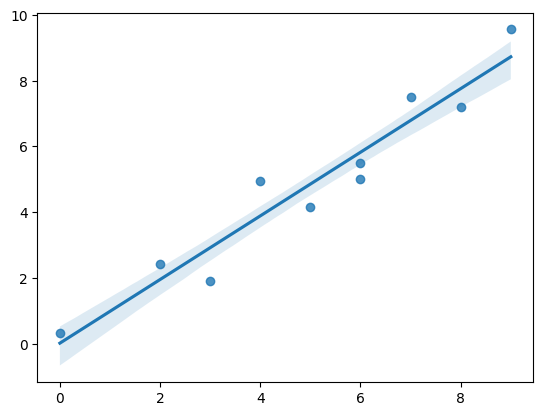

In [15]:
# visualizamos los resultados con un intervalo de confianza del 80%
# hay una correlacion positiva
grafico = sns.regplot(x = var1, y= var2, ci= 80)

In [18]:
#unimos las variables
tuple = list(zip(var1, var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [19]:
tabla = pd.DataFrame(tuple, columns= ['Dias_vacaciones', 'Dinero_gastado'])
tabla

,Dias_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [21]:
#intervalo a 95%
st.t.interval(alpha = 0.95, df = len(tabla)-1, loc = np.mean(tabla),
            scale = st.sem(tabla))

/mnt/d/Data_Science/Curso de Platzi/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/tmp/ipykernel_295/621346304.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha = 0.95, df = len(tabla)-1, loc = np.mean(tabla),


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

Para la primera variable, nuestro intervalo de confianza es de [3.004 dias, 2.847 dias] por lo que pdemos decir con un 95% de confianza que las personas saldran 3 días. Además de que se gastaran entre 6.86 y 6.99.